

> Se quiser treinar um modelo, rodar:
> 0. Globals
> 1. Download
> 3. Preprocessamento



# 0. Globals

In [ ]:
DENGUE_FILTERED_CSV = 'dengue_filtered.csv'
DENGUE_CSV = 'dengue_sinan.csv'

DRIVE_MAIN_FOLDER = '/content/drive/MyDrive/ADML43_'

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_rows', 300)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Download Raw Dataset

In [ ]:
!pip install unrar
!gdown https://drive.google.com/uc?id=1TNuSpTtwHXSoGDmgeFLWfJGCr5I8lC0K
!unrar x dengue_sinan_processed.rar
!ls

Downloading...
From (original): https://drive.google.com/uc?id=1TNuSpTtwHXSoGDmgeFLWfJGCr5I8lC0K
From (redirected): https://drive.google.com/uc?id=1TNuSpTtwHXSoGDmgeFLWfJGCr5I8lC0K&confirm=t&uuid=dc763c97-67cb-4b08-99c5-5e78dd5ce621
To: /content/dengue_sinan_processed.rar
100% 73.1M/73.1M [00:01<00:00, 53.6MB/s]

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from dengue_sinan_processed.rar


Would you like to replace the existing file dengue_sinan.csv
248009443 bytes, modified on 2024-04-05 17:32
with a new one
248009443 bytes, modified on 2024-04-05 17:32

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

# 2. Estatística Descritiva

In [ ]:
df = pd.read_csv(DENGUE_CSV)

<ipython-input-28-b2abfd619d4d>:1: DtypeWarning: Columns (30,31,53,54,55,59,61,63,65,71,83,89,100,116,131,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DENGUE_CSV)


In [ ]:
df['FEBRE'].shape

(620211,)

In [ ]:
# df.sample(50000).to_csv('50000_sample.csv')

In [ ]:
df.describe()

,NU_NOTIFIC,TP_NOT,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,SEM_PRI,SOUNDEX,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_DISTRIT,ID_BAIRRO,ID_LOGRADO,ID_GEO1,ID_GEO2,CS_ZONA,ID_PAIS,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,UF,MUNICIPIO,HOSPITAL,DDD_HOSP,TEL_HOSP,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CODISINF,CO_BAINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,NU_LOTE_I,TP_SISTEMA,NDUPLIC_N,DT_TRANSUS,DT_TRANSDM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W
count,6.202110e+05,620211.000000,620211.000000,620211.000000,620211.000000,620211.000000,619972.000000,6.196540e+05,620211.000000,0.0,620211.000000,620076.000000,611679.000000,477210.000000,620154.0,620211.000000,620178.000000,60191.000000,4.062510e+05,2.000000,6.700000e+01,1.600000e+01,560648.000000,620210.0,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,540788.000000,6151.000000,4886.000000,5016.000000,240156.000000,181470.000000,162017.000000,174076.000000,4533.000000,139824.000000,140095.000000,315799.000000,21330.000000,20508.000000,1.990800e+04,6817.000000,6.817000e+03,173415.000000,157206.000000,157225.000000,156213.000000,5345.000000,4.344800e+04,549797.000000,394506.000000,3724.000000,8651.000000,347605.000000,7319.000000,7356.000000,7332.000000,7344.000000,7297.000000,7386.000000,7318.000000,7295.000000,7302.000000,583.000000,585.000000,585.000000,582.00000,585.000000,586.000000,585.000000,585.000000,587.000000,582.000000,578.000000,577.000000,578.000000,585.000000,581.000000,5.00000,2.000000,2.0,2.0,2.000000,2.000000,2.0,2.000000,3.000000,0.0,2.000000,0.0,2.00000,2.0,613310.0,116.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,620209.000000,0.0,6.132800e+05,0.0
mean,1.635363e+05,2.000003,202089.455401,2020.719987,29.020938,292045.766950,1390.364726,4.224895e+06,202075.828657,NaN,3998.859208,6.041845,4.999426,7.320798,29.0,291835.397986,1389.030682,86.918327,3.091210e+03,146000.500000,1.165550e+07,2.919289e+07,1.249718,1.0,1.139925,1.264133,1.236594,1.805247,1.756091,1.669784,1.725822,1.959823,1.893396,1.729715,1.910005,1.968794,1.984095,1.729214,1.973716,1.993589,1.993352,1.995385,1.931825,1.992770,1.995237,3.314746,3.908719,3.912879,2.874727,3.508795,3.973565,3.768521,1.465917,3.989594,3.989086,2.279073,29.047164,292274.965867,3.356280e+06,73.727593,3.813011e+07,1.182574,29.006107,1.001177,291744.244775,153.961085,6.215275e+02,7.937175,1.663754,2.367615,1.013409,1.605406,1.858177,1.561718,1.777278,1.740468,1.950116,1.498917,1.880159,1.987800,1.966174,1.859348,1.928205,1.888889,1.87457,1.704274,1.708191,1.786325,1.758974,1.807496,1.915808,1.968858,1.958406,1.984429,1.784615,1.895009,5.80000,1.500000,2.0,2.0,1.500000,1.500000,2.0,1.500000,4.333333,NaN,29022.500000,NaN,6.50000,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.378242,NaN,9.544726e+04,NaN
std,5.592750e+05,0.001796,267.587171,2.684069,0.694210,6983.781566,64.124777,2.537868e+06,528.878688,NaN,239.928988,1.231721,2.670226,2.729121,0.0,958.494033,8.102705,133.192162,1.434918e+05,206361.335915,2.075429e+07,3.722669e+07,0.757530,0.0,0.346910,0.440871,0.424991,0.396011,0.429439,0.47029

In [ ]:
df.head()

,NU_NOTIFIC,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,SOUNDEX,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_DISTRIT,ID_BAIRRO,NM_BAIRRO,ID_LOGRADO,ID_GEO1,ID_GEO2,NM_REFEREN,CS_ZONA,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,HOSPITAL,DDD_HOSP,TEL_HOSP,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CODISINF,CO_BAINF,NOBAIINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,NU_LOTE_I,DS_OBS,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,DT_TRANSUS,DT_TRANSDM,DT_TRANSSM,DT_TRANSRM,DT_TRANSRS,DT_TRANSSE,NU_LOTE_V,NU_LOTE_H,CS_FLXRET,FLXRECEBI,IDENT_MICR,MIGRADO_W,ID_CNS_SUS_HASHED
0,158,2,A90,2016-03-05,201609,2016,29,292210,1381.0,2498731.0,2016-03-02,201609,NaN,3009.0,M,6.0,NaN,10.0,29.0,292210,1381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2016-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,2016-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0
1,298,2,A90,2016-02-15,201607,2016,29,293290,1385.0,3280969.0,2016-02-14,201607,NaN,4039.0,M,6.0,4.0,1.0,29.0,293290,1385.0,NaN,6.0,CONJUNTO HABITACIONAL URBIS,NaN,NaN,NaN,NaN,1.0,1.0,2016-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,2016-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,ebc774c2fc9be73f8d403772dc14539dbe6e448e117f62414157ccbca2e70382
2,5082,2,A90,2016-03-25,201612,2016,29,293250,1385.0,2800527.0,2016-03-24,201612,NaN,4053.0,F,5.0,4.0,0.0,29.0,293250,1385.0,NaN,192.0,UNA - SUCUPIRA,NaN,NaN,NaN,NaN,1.0,1.0,2016-03-25,NaN,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,4.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,29.0,1.0,293250.0,NaN,NaN,NaN,10.0,2.0,NaN,NaN,1.0,NaN,2016-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CEFALEIA, MIALGIA, ARTRALGIA.",2.0,NaN,2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,e0f037bc45eeea73df919230256055724a0bc45b990d6221929b25412ddf91b1
3,111262,2,A90,2016-03-24,201612,2016,29,291360,1385.0,2706628.0,2016-03-23,201612,NaN,4065.0,F,6.0,1.0,1.0,29.0,291360,1385.0,NaN,24.0,TEOTONIO VILELA,NaN,NaN,NaN,NaN,1.0,1.0,2016-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
atribute = 'CLASSI_FIN'

sa = df
sample = sa[sa[atribute].notna()][atribute]#[x for x in  if x ]

[ 1.  2.  5.  8. 10. 11. 12.] [  1201      2 158336 169106 215033   5656    463]


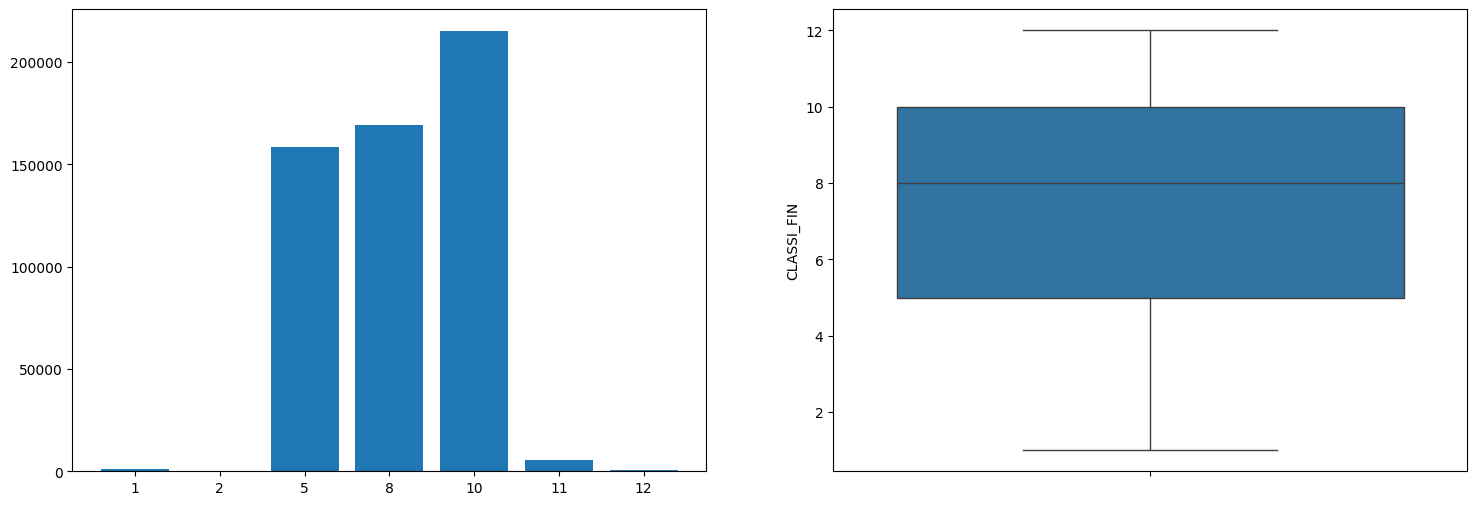

In [ ]:


fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18, 6))


u, counts = np.unique(sample, return_counts=True)
axs[0].bar([str(int(x)) for x in u], counts, align="center")
# sns.countplot(data=sample, ax=axs[0])
ax = sns.boxplot(data=sample, orient="v", ax=axs[1])
print(u, counts)
# df[atribute].plot.hist(grid=True, bins=10, rwidth=0.9,
#                    color='#607c8e')

# 3. Preprocessamento

## Save

In [ ]:
df = pd.read_csv(DENGUE_CSV)

In [ ]:
df.sample(5)

In [ ]:
df.columns

In [ ]:
import pprint

special = {
    'CS_ZONA', # Zona de residência do paciente por ocasião da notificação  | 1. urbana 2. rural 3. periurbana 9. ignorado
    'CS_FLXRET', # Identifica em qual microcomputador foi digitado o registro por ocasião de sua 1ª inclusão no Sinan
    'DT_PRNT', # Data da Coleta Exame PRNT
}
dropped = dict()
reasonsD = dict()
active = set()
for col in df:
    l = df[col]

    k = l.value_counts()

    reasons = []

    if(col in special):
        reasons.append('Special reason. Internal, local or date')

    if(k.shape[0] <= 1):
        reasons.append('Only 1 item, useless')
    if(k.shape[0] >= 300):
        reasons.append('Too many items')

    NaNs = len(l) - l.count()
    NaNPercentage = NaNs / len(l)

    if(NaNPercentage >= 0.9999):
        reasons.append('Way too many NaNs')

    if(len(reasons)<=0):
        if(k.sum()-k.max() < 10):
            reasons.append('Extremely unbalanced')
        elif((l.dtype == 'int64' or l.dtype == 'float64') and l.max() > 50 and col != 'NU_IDADE_N'):
            reasons.append('Max too big. This was made to disqualify region, dates and internal')

    if(len(reasons)>0):
        dropped[col] = reasons
        for r in reasons:
            if r not in reasonsD:
                reasonsD[r] = [col]
            else:
                reasonsD[r].append(col)
    else:
        active.add(col)
print(dropped.keys())
pprint.pprint(reasonsD)
active
# df_filtered = df.copy()

In [ ]:
df_filtered = df[list(active)]
# df_filtered = df_filtered[df['CLASSI_FIN'].notna()]
df_filtered.dropna(subset=['CLASSI_FIN', 'CS_SEXO'], how='any')

Y = [1 if (x == 10.0 or x == 11.0 or x == 12.0) else 0  for x in df_filtered['CLASSI_FIN']]
df_filtered.drop('CLASSI_FIN', axis=1, inplace=True)

In [ ]:
# Save
df_filtered['Y'] = Y
df_filtered.to_csv(DENGUE_FILTERED_CSV, encoding='UTF-8', index=False)

In [ ]:
df.sample(5)

In [ ]:
!ls

## Load

In [ ]:
# Load
df_filtered = pd.read_csv(DENGUE_FILTERED_CSV)
df_filtered.sample(5)

In [ ]:
Y = df_filtered['Y']
df_filtered.drop('Y', axis=1, inplace=True)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical = set(['NU_IDADE_N'])
#   | CS_SEXO
# 1 | M
# 2 | F
#
# ->
#   | CS_SEXO_M | CS_SEXO_F | CS_SEXO_I
# 1 | 1         | 0         | 0
# 2 | 0         | 1         | 0

preprocessor = make_column_transformer(
 (StandardScaler(), list(numerical)),
 (OneHotEncoder(), [x for x in active if (x not in numerical and x != 'CLASSI_FIN')])
)

X_transformed = preprocessor.fit_transform(df_filtered)
X_transformed

In [ ]:
# print(X.shape, Y.shape)

In [ ]:
# np.save('X_transformed.npy', X_transformed)
# np.save('Y.npy', Y)

## Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, stratify=Y,
                                                    test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
# Clean RAM
# X_transformed = Y = df_filtered = df = None

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, stratify=Y,
#                                                     test_size=0.97, random_state=57)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# 4. Treinamento

## KNN

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 485 (delta 146), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (485/485), 134.51 KiB | 1.75 MiB/s, done.
Resolving deltas: 100% (248/248), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 837.2 kB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pynvml/nvml.py", line 1798, in _LoadNvmlLibrary
    nvmlLib = CDLL("libnvidia-ml.so.1")
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: libnvidia-ml.so.1: cannot open shared object file: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 18, in <module>
    pynv

In [ ]:
import cudf, cuml
from cuml.neighbors import KNeighborsClassifier as cuKNeighbors

model = cuKNeighbors(n_neighbors=5)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


ImportError: 
================================================================
Failed to import CuPy.

If you installed CuPy via wheels (cupy-cudaXXX or cupy-rocm-X-X), make sure that the package matches with the version of CUDA or ROCm installed.

On Linux, you may need to set LD_LIBRARY_PATH environment variable depending on how you installed CUDA/ROCm.
On Windows, try setting CUDA_PATH environment variable.

Check the Installation Guide for details:
  https://docs.cupy.dev/en/latest/install.html

Original error:
  ImportError: libcuda.so.1: cannot open shared object file: No such file or directory
================================================================


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

acuracia = accuracy_score(y_test , y_hat)
print("Acurácia : {}".format(round(acuracia*100,4)))
print(classification_report(y_test, y_hat))

In [ ]:
np.save(DRIVE_MAIN_FOLDER+'KNN_yhat.npy', y_hat)

## Regressão logistica


In [ ]:
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression()
clflog.fit(X_train, y_train)
y_hat = clflog.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

acuracia = accuracy_score(y_test , y_hat)
print("Acurácia : {}".format(round(acuracia*100,4)))
print(classification_report(y_test, y_hat))

In [ ]:
param_grid_lr = {
    "max_iter": [1000],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #"class_weight": ['balanced'],
    #"C":np.logspace(-3,3,7),
    "penalty":["l1","l2"]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid_lr, cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


## Árvore de decisão

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

In [ ]:
default_test_size = 0.2

In [ ]:
seed = 42

In [ ]:
# Usa estas variáveis para treino e validação
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Caso não existam, rodar:
# # # 0. Globals
# # # 1. Download
# # # 3. Preprocessamento

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    criterion = 'entropy',  # Critério de Divisão: Entropia
    max_depth = None,       # Profundidade Máxima: Sem limite inicial, ajustável com validação cruzada.
    min_samples_split = 2,  # Número Mínimo de Amostras para Divisão de um Nó: 2
    min_samples_leaf = 1,   # Número Mínimo de Amostras em um Nó Folha: 1
)
clf = clf.fit(X_train, y_train)

In [ ]:
y_hat = clf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

acuracia_baseline = accuracy_score(y_test, y_hat)
print("Acurácia inicial: {}".format(round(acuracia_baseline*100,4)))
print(classification_report(y_test, y_hat))

In [ ]:
pipe = Pipeline([
    ('scaler',  MaxAbsScaler()),
    ('clf', DecisionTreeClassifier(criterion='entropy', random_state=seed))
])


In [ ]:
hyperparameters = {
    'clf__max_depth': [None, 10, 20, 30, 40, 50],
    'clf__min_samples_split': randint(2, 21),
    'clf__min_samples_leaf': randint(1, 11),
    'clf__max_features': [None, 'sqrt', 'log2'], }

In [ ]:
random_search = RandomizedSearchCV(pipe,
                           param_distributions=hyperparameters,
                           n_iter=20,
                           return_train_score=True,
                           scoring='accuracy',
                           n_jobs=-1,
                           cv=5,
                           verbose=2)

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingGridSearchCV

hyperparameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],  # Critério de Divisão: Entropia
    # 'max_depth' : None,                           # Profundidade Máxima: Sem limite inicial, ajustável com validação cruzada.
    'min_samples_split': [2,4,8,16],                # Número Mínimo de Amostras para Divisão de um Nó: 2
    'min_samples_leaf': [1,2,4,8,16,32,64,128],     # Número Mínimo de Amostras em um Nó Folha: 1
}


search = HalvingGridSearchCV(clf,
                               hyperparameters,
                              #  resource='n_estimators',
                              #  max_resources=10,
                               scoring='f1',
                               random_state=seed,
                               n_jobs=-1,
                               cv=3,
                               verbose=2).fit(X_train, y_train)

In [ ]:
filename_search = DRIVE_MAIN_FOLDER+'HalvingGridSearchCV_DecisionTreeClassifier.pickle'

In [ ]:
import pickle

with open(filename_search, 'wb') as handle:
    pickle.dump(search, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
_search = search

In [ ]:
_search = None
with open(filename_search, 'rb') as handle:
    _search = pickle.load(handle)


In [ ]:
all_results = pd.DataFrame(_search.cv_results_)
all_results

In [ ]:
results = pd.DataFrame(_search.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={_search.n_resources_[i]}\nn_candidates={_search.n_candidates_[i]}"
    for i in range(_search.n_iterations_)
]

ax.set_xticks(range(_search.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()
plt.show()


In [ ]:
random_search.fit(X_train, y_train)

In [ ]:
best_pipe = random_search.best_estimator_
print("Melhores hiperparâmetros:", random_search.best_params_)

In [ ]:
y_pred = best_pipe.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia final: {accuracy:.4f}\n")
print(classification_report(y_test, y_pred))

## Random Forest

In [ ]:
# Usa estas variáveis para treino e validação
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# Caso não existam, rodar:
# # # 0. Globals
# # # 1. Download
# # # 3. Preprocessamento

(415541, 239) (415541,) (204670, 239) (204670,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    max_depth=2,
    random_state=0,
    n_estimators=100,     # Número de Árvores na Floresta: 100
    criterion="entropy"   # Critério de Divisão: Entropia
  )
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, random_state=0)

In [ ]:
y_hat = clf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

acuracia_baseline = accuracy_score(y_test, y_hat)
print("Acurácia inicial: {}".format(round(acuracia_baseline*100,4)))
print(classification_report(y_test, y_hat))

Acurácia inicial: 83.3131
              precision    recall  f1-score   support

           0       0.80      0.99      0.88    131690
           1       0.97      0.55      0.70     72980

    accuracy                           0.83    204670
   macro avg       0.88      0.77      0.79    204670
weighted avg       0.86      0.83      0.82    204670



## MLP

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (415541, 239)
X_test shape: (204670, 239)


In [ ]:

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=200,
    batch_size=32,
    random_state=42
  )

mlp.fit(X_train, y_train)

y_hat = mlp.predict(X_test)

In [ ]:
y_hat = clf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

acuracia_baseline = accuracy_score(y_test, y_hat)
print("Acurácia inicial: {}".format(round(acuracia_baseline*100,4)))
print(classification_report(y_test, y_hat))

# 5. Treinamento Hyperparâmetro

In [ ]:
seed = 0

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

hyperparameters = {
    "n_neighbors" : [5,7,10,13,15],
}

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


hyperparameters = {
    "max_iter": [1000],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #"class_weight": ['balanced'],
    #"C":np.logspace(-3,3,7),
    "penalty":["l1","l2"]
}



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(
    criterion = 'entropy',  # Critério de Divisão: Entropia
    max_depth = None,       # Profundidade Máxima: Sem limite inicial, ajustável com validação cruzada.
    min_samples_split = 2,  # Número Mínimo de Amostras para Divisão de um Nó: 2
    min_samples_leaf = 1,   # Número Mínimo de Amostras em um Nó Folha: 1
)

hyperparameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],  # Critério de Divisão: Entropia
    'min_samples_split': [2,4,8,16],                # Número Mínimo de Amostras para Divisão de um Nó: 2
    'min_samples_leaf': [1,2,4,8,16,32,64,128],     # Número Mínimo de Amostras em um Nó Folha: 1
}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf =  RandomForestClassifier(
    random_state=0,
    n_estimators=100,     # Número de Árvores na Floresta: 100
    criterion="entropy"   # Critério de Divisão: Entropia
)

hyperparameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],  # Critério de Divisão: Entropia
    'n_estimators': [10,100,200,250,400,800],     # Número Mínimo de Amostras em um Nó Folha: 1
}

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=200,
    batch_size=32,
    random_state=42
  )

hyperparameters = {
    'hidden_layer_sizes' : [(100, 100), (100,100,100), (100,100,100,100), (200,200), (300,300), (100,200,300), (400,400,400)]
    'criterion' : ['gini', 'entropy', 'log_loss'],  # Critério de Divisão: Entropia
    'n_estimators': [10,100,200,250,400,800],     # Número Mínimo de Amostras em um Nó Folha: 1
}
mlp.fit(X_train, y_train)

y_hat = mlp.predict(X_test)

## Rest

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingGridSearchCV


search = HalvingGridSearchCV(clf,
                               hyperparameters,
                              #  resource='n_estimators',
                              #  max_resources=10,
                               scoring='f1',
                               random_state=seed,
                               n_jobs=-1,
                               cv=3,
                               verbose=100).fit(X_train, y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 2067
max_resources_: 18606
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 18
n_resources: 2067
Fitting 3 folds for each of 18 candidates, totalling 54 fits
----------
iter: 1
n_candidates: 6
n_resources: 6201
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 2
n_candidates: 2
n_resources: 18603
Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [ ]:
filename_search = DRIVE_MAIN_FOLDER+clf.__class__.__name__+'.pickle'
filename_search

'/content/drive/MyDrive/ADML43_RandomForestClassifier.pickle'

In [ ]:
import pickle
filename_search = DRIVE_MAIN_FOLDER+clf.__class__.__name__+'.pickle'
with open(filename_search, 'wb') as handle:
    pickle.dump(search, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load Pickle
# search = None
# import pickle
# filename_search = DRIVE_MAIN_FOLDER+'DecisionTreeClassifier.pickle'

# with open(filename_search, 'rb') as handle:
#     search = pickle.load(handle)

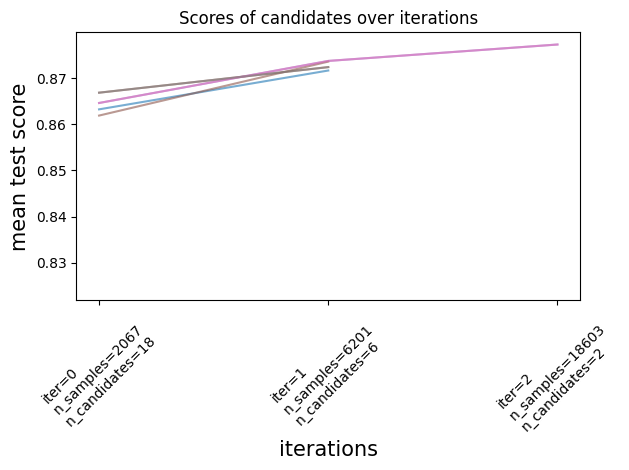

In [ ]:
import os

results = pd.DataFrame(search.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={search.n_resources_[i]}\nn_candidates={search.n_candidates_[i]}"
    for i in range(search.n_iterations_)
]

ax.set_xticks(range(search.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()

plt.savefig(DRIVE_MAIN_FOLDER+clf.__class__.__name__+f'.png', bbox_inches='tight')

In [ ]:


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

best_pipe = search.best_estimator_
print("Melhores hiperparâmetros:", search.best_params_)
print("Best score :",search.best_score_)

lines = ['line1', 'line2']
with open(DRIVE_MAIN_FOLDER+clf.__class__.__name__+f'_report.txt', 'w') as f:
    f.write("Melhores hiperparâmetros:"+str(search.best_params_))
    f.write("\n")
    f.write("Best score :"+str(search.best_score_))


Melhores hiperparâmetros: {'criterion': 'log_loss', 'n_estimators': 400}
Best score : 0.8772515927873686


In [ ]:

y_pred = best_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11972
           1       0.89      0.88      0.88      6634

    accuracy                           0.92     18606
   macro avg       0.91      0.91      0.91     18606
weighted avg       0.92      0.92      0.92     18606



In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)
reportPD = pd.DataFrame(report).transpose()
reportPD.to_csv(DRIVE_MAIN_FOLDER+clf.__class__.__name__+f'_report.csv')
reportPD

ValueError: Found input variables with inconsistent numbers of samples: [601605, 18606]